In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv(r"C:\Users\Admin\Datasets\Social_Network_Ads.csv")

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [6]:
# Now spliting our model into train and test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
x_train.shape

(320, 2)

In [15]:
# Next step is
# Feature Scaling is essential part before doing Support Vector

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
# Note why we use 'fit_transform' for 'x_train' AND
# why we use 'transform' for 'x_test'
# the reason is to avoid Data Likeage

In [ ]:
# Our data is fully prepared now ready for model training

In [20]:
from sklearn.svm import SVC
Classfied = SVC(kernel= 'linear', random_state=0)
Classfied.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [25]:
print(Classfied.predict(sc.transform([[30, 87000]])))

[0]


In [26]:
# Now see Test results on this accuracy metrics
# before that doing prediction

In [27]:
y_pred = Classfied.predict(x_test)
# Y_pred always done on x_test

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [29]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [30]:
y_pred.shape

(80, 1)

In [31]:
y_test.shape

(80, 1)

In [32]:
print(np.concatenate((y_pred, y_test), axis = 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [33]:
# Now how to make confusion matrix and see accuracy score

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
cm = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)

In [36]:
print(cm)
print(acc)

[[57  6]
 [ 1 16]]
0.9125


In [37]:
# How to verify our test results and visualize it

C:\Users\Admin\AppData\Local\Temp\ipykernel_25860\2995988938.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0], x_set[y_set == j,1] , c = ListedColormap(('red','green'))(i), label=j)


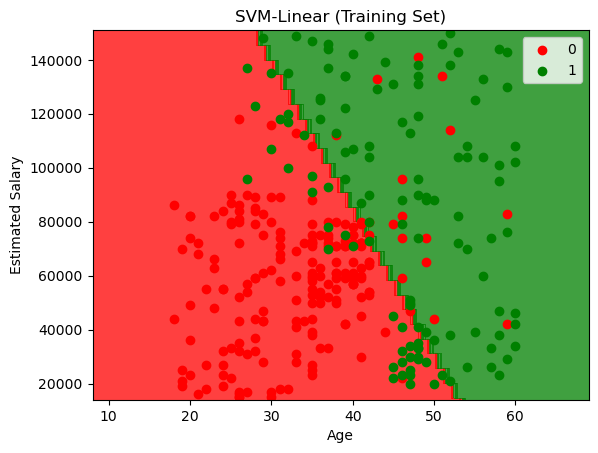

In [39]:
from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -10 , stop = x_set[:,0].max() +10, step=1),
                     np.arange(start = x_set[:,1].min() -1000 , stop = x_set[:,1].max() +1000, step=1))

plt.contourf(x1, x2, Classfied.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set == j,1] , c = ListedColormap(('red','green'))(i), label=j)

plt.title('SVM-Linear (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()